## 2.0 Introduction to gatefilters

This notebook will introduce the use of gatefilters to filter artifacts from your data.

In [27]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')
import pyart
import cartopy.crs as ccrs

Populating the interactive namespace from numpy and matplotlib


Load the radar file!

In [28]:
radar = pyart.io.read('../inf_tutorial_data/sgpxsaprcmacsurI5.c1.20170801.044013.nc')

We will again plot the radar file. Notice that there are many second trip echoes as well as nonhydrometeor echoes that are visible.

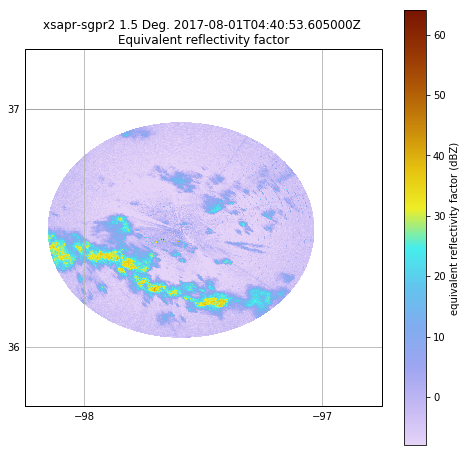

In [29]:
fig = plt.figure(figsize=[8, 8])
display = pyart.graph.RadarMapDisplayCartopy(radar)
display.plot_ppi_map('reflectivity', sweep=2, resolution='50m',
                     vmin=-8, vmax=64, min_lon=-98.25, max_lon=-96.75,
                     min_lat=35.75, max_lat=37.25,
                     projection=ccrs.PlateCarree(), cmap='pyart_LangRainbow12')
plt.show()

When both displaying and analyizing such data, it is desirable to remove such echoes. Py-ART provides the GateFilter class for doing such filtering.

In [30]:
gatefilter = pyart.filters.GateFilter(radar)

The below example shows how you can use a gatefilter to exclude values where gate_id is equal to a certain value. In this example, we are excluding regions identified as second trip echoes (gate_id = 0), nonhydrometeors (gate_id = 1), and clutter (gate_id = 2). The list of functions available to you through GateFilter are available here:

http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.filters.GateFilter.html

In [31]:
gatefilter.exclude_equal('gate_id',0)
gatefilter.exclude_equal('gate_id',3)
gatefilter.exclude_equal('gate_id',5)

The gatefilter can be then be specified as an input to plot_ppi_map()

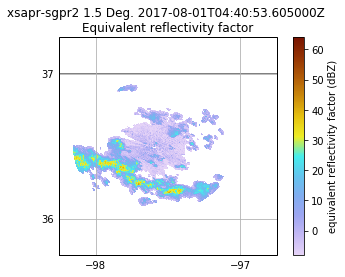

In [32]:
display = pyart.graph.RadarMapDisplayCartopy(radar)
display.plot_ppi_map('reflectivity', sweep=2, resolution='50m',
                     vmin=-8, vmax=64, min_lon=-98.25, max_lon=-96.75,
                     min_lat=35.75, max_lat=37.25,
                     projection=ccrs.PlateCarree(), cmap='pyart_LangRainbow12',
                     gatefilter=gatefilter)
plt.show()

The structure of the gatefilter includes boolean arrays of the same shape as the radar fields that tell you whether a gate is excluded (gatefilter.gate_excluded) or included (gatefilter.gate_included). These can be used to do calculations on the data that include the filter. For example, if we want to get the mean reflectivity of each sweep, we can do:

In [37]:
refl_array = np.ma.masked_where(gatefilter.gate_included == False, radar.fields['reflectivity']['data'])
reflectivity_w_mask = [refl_array[x].mean() for x in radar.iter_slice()]
reflectivity = [radar.fields['reflectivity']['data'][x].mean() for x in radar.iter_slice()]
print(reflectivity)
print(reflectivity_w_mask)

[1.6201527500554447, 0.21088560696998765, -0.5545996115408073, -1.165538730608013, -1.637849168593401, -2.2185167755278568, -2.7672786330544326, -3.4961842192810764, -4.244680592984441, -4.907398152974316, -5.373153090082346, -5.837250587830794, -6.286520491348713, -6.681227714097168, -7.233450163321669, -7.42737878670231, -7.807534983555095, -8.225286457466751, -8.734058159914806, -9.134024099392661, -9.540883690618154, -9.860045899547938, -10.211399954517217, -10.30493878354839]
[3.647486164646895, 3.096995678720277, 3.0082439912236962, 3.184197424322889, 3.4625539200847584, 3.3488251537753118, 2.9518868665260265, 2.353768519330236, 1.7735773430336788, 1.4612815289677072, 1.0839542725512294, 0.6222056179645108, 0.2991135092145678, 0.1719206437880755, -0.007680294004341664, 0.1769710490264443, 0.3500161633987037, 0.6911059318530323, 0.800984920313048, 0.21199543001350324, 0.7060750797563805, 1.2318262895837817, 1.645603889326794, 2.1715546287441647]


## Exercise

Create a gatefilter where all regions with reflectivity less than zero are excluded and plot the result. Play around with different thresholds of reflectivity, normalized coherent power, etc.

In [ ]:
%load section0_answer.py